<a href="https://colab.research.google.com/github/Hesham-14/Neural-Network-Projects/blob/main/LSTM_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Hesham mohamed mohamed
# 9/10/21

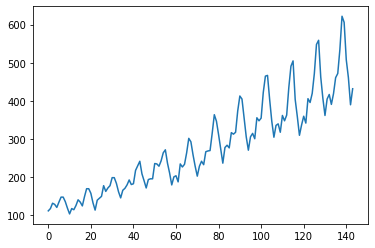

In [3]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('/content/AirPassengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

In [4]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [6]:
# load the dataset
dataframe = pandas.read_csv('/content/AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [8]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset), :]
print(len(train), len(test))

96 48


In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i : (i+look_back) , 0]
    dataX.append(a)
    dataY.append(dataset[i+look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [sample, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
94/94 - 2s - loss: 0.0617 - 2s/epoch - 19ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0323 - 139ms/epoch - 1ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0235 - 139ms/epoch - 1ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0210 - 153ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0199 - 139ms/epoch - 1ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0189 - 133ms/epoch - 1ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0179 - 133ms/epoch - 1ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0171 - 148ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0161 - 130ms/epoch - 1ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0151 - 139ms/epoch - 1ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0142 - 146ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0133 - 143ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0125 - 128ms/epoch - 1ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0116 - 160ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0107 - 135ms/epoch - 1ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0098 - 142ms/epoc

In [10]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainscore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print ('train score: %.2f RMSE' % (trainscore))
testscore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print ('test score: %.2f RMSE' % (testscore))

train score: 23.32 RMSE
test score: 48.73 RMSE


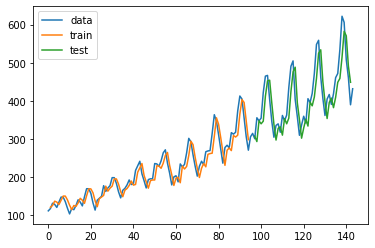

In [11]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='data')
plt.plot(trainPredictPlot, label='train')
plt.plot(testPredictPlot, label='test')
plt.legend()
plt.show()

Epoch 1/100
92/92 - 2s - loss: 0.0293 - 2s/epoch - 17ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0109 - 135ms/epoch - 1ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0084 - 128ms/epoch - 1ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0073 - 130ms/epoch - 1ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0063 - 127ms/epoch - 1ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0057 - 131ms/epoch - 1ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0050 - 131ms/epoch - 1ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0047 - 143ms/epoch - 2ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0044 - 127ms/epoch - 1ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0041 - 134ms/epoch - 1ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0040 - 131ms/epoch - 1ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0040 - 128ms/epoch - 1ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0037 - 126ms/epoch - 1ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0039 - 131ms/epoch - 1ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0037 - 138ms/epoch - 2ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0036 - 127ms/epoc

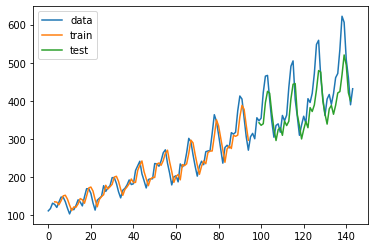

In [12]:
# LSTM for international airline passengers problem using window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [],[]
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = pandas.read_csv('/content/AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset), :]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [sample, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2) 
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print ('Train score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print ('Test score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='data')
plt.plot(trainPredictPlot, label='train')
plt.plot(testPredictPlot, label='test')
plt.legend()
plt.show()